In [1]:
import pandas as pd
import numpy as np
import pyreadr
import matplotlib.pyplot as plt

In [4]:
year = 89
df1 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base1\base{year}")
df2 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base2\HHP1_{year}")
df3 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base3\P2_{year}")
df4 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Food_{year}")
df5 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Cigar_{year}")
df6 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\NonCatDrinks_{year}")
df7 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Cloth_{year}")
df8 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Invest_{year}")
df9 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Part3_{year}")
df10 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section04_{year}")
df11 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section13_{year}")
dataframes = []
dataframes.extend([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])
for i in range(len(dataframes)):
    df = dataframes[i]
    print(df.columns)
    print(df.shape)
    

Index(['HHID', 'month', 'head_job', 'household_type', 'region', 'quarter',
       'weight', 'county_code', 'province_code', 'county89', 'province'],
      dtype='object')
(38950, 11)
Index(['HHID', 'HHsize', 'AveAge', 'NumChild_U5', 'NumChild_B5_7',
       'NumChild_B7_18', 'NumChildOver18', 'HeadWoman', 'Dep_Student',
       'Num_Literate', 'NumSpouse', 'NumEmployed', 'NumOld', 'NumMale',
       'NumNotfirstR'],
      dtype='object')
(38285, 15)
Index(['HHID', 'Tenure', 'Othertenure', 'Room', 'Area', 'Skeleton',
       'MainMaterial', 'PrivateVehicle', 'Motorcycle', 'Bike', 'Radio',
       'Cassette', 'TVbw', 'TV', 'VideoPlayer', 'Computer', 'Cellphone',
       'Freezer', 'Refrigerator', 'Freez_refrig', 'Oven', 'Vacuum', 'Washer',
       'Sewing', 'Fan', 'Cooler_water_portable', 'Cooler_gas_portable',
       'Dishwasher', 'None', 'Pipewater', 'Electricity', 'Pipegas', 'Phone',
       'Internet', 'Bathroom', 'Kitchen', 'Cooler_water', 'Centralcooler',
       'Centralheat', 'Pakage', 'C

In [29]:
pd.set_option('display.float_format', '{:.0f}'.format)
years = list(range(89, 99))+ [99] + list(range(1400, 1404))
df12 = pd.DataFrame()
for year in years:
    dataframes = []
    df1 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base1\base{year}")
    df2 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base2\HHP1_{year}")
    df3 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base3\P2_{year}")
    df4 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Food_{year}")
    df5 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Cigar_{year}")
    df6 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\NonCatDrinks_{year}")
    df7 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Cloth_{year}")
    df8 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Invest_{year}")
    df9 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Part3_{year}")
    df10 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section04_{year}")
    df11 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section13_{year}")
    
    dataframes.extend([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])
    merged_df = dataframes[0]
    for i in range(1, len(dataframes)):
        merged_df = merged_df.merge(dataframes[i], on='HHID', how='left')
    
    merged_df["year"] = year
    print(merged_df.shape[0])
    
    pd.to_pickle(merged_df, f"Merged_{year}")
    
    metadata = pd.DataFrame({
    "col" : list(merged_df.columns),
    f"missed{year}" : merged_df.isna().sum(),
    })
    
    if year == 89:
        df13 = metadata.reset_index(drop=True)
    else:
        df13 = pd.merge(df13, metadata, on="col", how="left")

    

38950
40011
40007
39864
39856
39857
39864
37962
38960
38328
37557
37988
37951
37883
37505


In [30]:
pd.to_pickle(df13, "meta_data")

In [31]:
meta_data = pd.read_pickle("meta_data")
meta = meta_data.set_index(meta_data["col"]).transpose()
meta = meta.iloc[1:,:]
meta

col,HHID,month,head_job,household_type,region,quarter,weight,county_code,province_code,county89,...,ClothesExtraExp,HousingMaintainExp,FurniExtraExp,MedicalExtraExp,TransportationExtraExp,CommunicationExtraExp,AmusementExtraExp,EducationExp,OtherExtraExp,year
missed89,0,0,0,0,0,0,38950,665,0,665,...,0,0,0,0,0,0,0,0,0,0
missed90,0,1,4,0,0,0,40011,1498,0,1498,...,0,0,0,0,0,0,0,0,0,0
missed91,0,0,0,0,0,0,40007,1815,0,NaN,...,0,0,0,0,0,0,0,0,0,0
missed92,0,12,1549,0,0,0,39864,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
missed93,0,0,0,0,0,0,39856,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
missed94,0,0,0,0,0,0,39857,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
missed95,0,0,0,0,0,0,39864,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
missed96,0,0,NaN,0,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
missed97,0,1,NaN,0,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
missed98,0,0,NaN,0,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [32]:
list_cols = []
for col in meta.columns:
    if meta[col].isna().sum() == 0:
        list_cols.append(col)

print(list_cols)

['HHID', 'month', 'household_type', 'region', 'quarter', 'weight', 'county_code', 'province_code', 'province', 'HHsize', 'AveAge', 'NumChild_U5', 'NumChild_B5_7', 'NumChild_B7_18', 'NumChildOver18', 'HeadWoman', 'Dep_Student', 'Num_Literate', 'NumSpouse', 'NumEmployed', 'NumOld', 'NumMale', 'NumNotfirstR', 'Tenure', 'Room', 'Area', 'Skeleton', 'MainMaterial', 'PrivateVehicle', 'Motorcycle', 'Bike', 'Radio', 'Cassette', 'TVbw', 'TV', 'VideoPlayer', 'Computer', 'Cellphone', 'Freezer', 'Refrigerator', 'Freez_refrig', 'Vacuum', 'Washer', 'Sewing', 'Fan', 'Cooler_water_portable', 'Cooler_gas_portable', 'Dishwasher', 'None', 'Pipewater', 'Electricity', 'Pipegas', 'Phone', 'Internet', 'Bathroom', 'Kitchen', 'Cooler_water', 'Centralcooler', 'Centralheat', 'Pakage', 'Cooler_gas', 'Sewer_network', 'Cookfuel', 'Heatfuel', 'Hotwaterfuel', 'FoodExp', 'CigarExp', 'NonCatDrinksExp', 'ClothExp', 'InvestExp', 'FurnitureExp', 'MedicalExp', 'TransportationExp', 'CommunicationExp', 'AmusementExp', 'Restau

In [33]:
len(list_cols)

101

In [34]:
merged = pd.read_pickle(r"C:\Users\Mahsa\Desktop\geo\merged\Merged_89")
merged = merged.loc[:, list_cols]
years = list(range(90, 99))+ [99] + list(range(1400, 1404))

for year in years:
    df = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\merged\Merged_{year}")
    df = df.loc[:, list_cols]
    merged = pd.concat([merged, df], axis=0)
    
full_rows = pd.Series([
    38950,
    40011,
    40007,
    39864,
    39856,
    39857,
    39864,
    37962,
    38960,
    38328,
    37557,
    37988,
    37951,
    37883,
    37505
])
print(merged.shape)
print(full_rows.sum()==merged.shape[0])

(582543, 101)
True


In [35]:
exps = [
    'FoodExp', 'CigarExp', 'NonCatDrinksExp', 'ClothExp',
    'InvestExp', 'FurnitureExp', 'MedicalExp', 'TransportationExp',
    'CommunicationExp', 'AmusementExp', 'RestaurantExp', 'HotelExp',
    'OtherExp', 'RentExp', 'EstRent_ownerExp', 'EstRentExp', 'MortgageExp', 'WaterExp',
    'Water_otherExp', 'SewageExp', 'OtherHousingExp', 'ElectricityExp',
    'ElectricityOtherExp', 'NaturalGasExp', 'NaturalGasOtherExp',
    'OtherEnergyReExp', 'ClothesExtraExp', 'HousingMaintainExp',
    'FurniExtraExp', 'MedicalExtraExp', 'TransportationExtraExp',
    'CommunicationExtraExp', 'AmusementExtraExp', 'EducationExp',
    'OtherExtraExp'
]
merged[exps] = merged[exps].fillna(0)
merged["all_expenditure"] = (
    merged["FoodExp"]+
    merged["CigarExp"]+
    merged["NonCatDrinksExp"]+
    merged["ClothExp"]+
    #merged["InvestExp"]+
    merged["FurnitureExp"]+
    merged["MedicalExp"]+
    merged["TransportationExp"]+
    merged["CommunicationExp"]+
    merged["AmusementExp"]+
    merged["RestaurantExp"]+
    merged["HotelExp"]+
    merged["OtherExp"]+
    merged["RentExp"]+
    merged["EstRent_ownerExp"]+
    merged["EstRentExp"]+
    #merged["MortgageExp"]+
    merged["WaterExp"]+
    merged["Water_otherExp"]+
    merged["SewageExp"]+
    merged["OtherHousingExp"]+
    merged["ElectricityExp"]+
    merged["ElectricityOtherExp"]+
    merged["NaturalGasExp"]+
    merged["NaturalGasOtherExp"]+
    merged["OtherEnergyReExp"]+
    merged["ClothesExtraExp"]+
    merged["HousingMaintainExp"]+
    merged["FurniExtraExp"]+
    merged["MedicalExtraExp"]+
    merged["TransportationExtraExp"]+
    merged["CommunicationExtraExp"]+
    merged["AmusementExtraExp"]+
    merged["EducationExp"]+
    merged["OtherExtraExp"]
)

In [36]:
merged["HHID"].str.len().unique()

array([10,  4, 11], dtype=int64)

In [37]:
years_by_hhid = merged.groupby('HHID')['year'].agg(list).reset_index()
print(years_by_hhid.head())
years_by_hhid["num"] = years_by_hhid["year"].apply(len)
years_by_hhid[years_by_hhid["num"]>3]

         HHID          year
0  1000001171          [89]
1  1000001172      [89, 90]
2  1000001177  [89, 90, 91]
3  1000001180  [89, 90, 91]
4  1000001181  [89, 90, 91]


,HHID,year,num
800,10001000108,"[92, 93, 97, 98]",4
806,10001000116,"[92, 93, 94, 99]",4
807,10001000117,"[93, 94, 97, 98]",4
810,10001000120,"[93, 94, 95, 98, 99, 1400]",6
811,10001000123,"[93, 94, 95, 98, 99]",5
...,...,...,...
3975,10010008917,"[93, 97, 98, 99]",4
3979,10010008923,"[93, 94, 95, 98, 99, 1400]",6
3983,10010008929,"[94, 96, 99, 1400, 1401]",5
3986,10010008935,"[95, 96, 1400, 1401, 1402]",5


In [38]:
merged["all_energy_EXP"] = merged["ElectricityExp"]+merged["ElectricityOtherExp"]+merged["NaturalGasExp"]+merged["NaturalGasOtherExp"]+merged["OtherEnergyReExp"]
merged["energy_Ratio"] = (merged["all_energy_EXP"] / merged["all_expenditure"]) *100

In [39]:
merged.isna().sum()

HHID                    0
month              151341
household_type          0
region                  0
quarter                 0
                    ...  
OtherExtraExp           0
year                    0
all_expenditure         0
all_energy_EXP          0
energy_Ratio        10430
Length: 104, dtype: int64

In [40]:
print((merged["FoodExp"]==0).sum())
years = list(range(90, 99))+ [99] + list(range(1400, 1404))
for year in years:
    print(merged["FoodExp"].describe())

12214
count      582543
mean     12269108
std      18458187
min             0
25%       2829000
50%       5468000
75%      13182000
max     977326420
Name: FoodExp, dtype: float64
count      582543
mean     12269108
std      18458187
min             0
25%       2829000
50%       5468000
75%      13182000
max     977326420
Name: FoodExp, dtype: float64
count      582543
mean     12269108
std      18458187
min             0
25%       2829000
50%       5468000
75%      13182000
max     977326420
Name: FoodExp, dtype: float64
count      582543
mean     12269108
std      18458187
min             0
25%       2829000
50%       5468000
75%      13182000
max     977326420
Name: FoodExp, dtype: float64
count      582543
mean     12269108
std      18458187
min             0
25%       2829000
50%       5468000
75%      13182000
max     977326420
Name: FoodExp, dtype: float64
count      582543
mean     12269108
std      18458187
min             0
25%       2829000
50%       5468000
75%      1318200

# Merging the weights

In [26]:
years = list(range(89, 96))
theirdf = pd.DataFrame(columns=["HHID","Year","Weight"])
for year in years:
    df3 = pyreadr.read_r(fr"C:\Users\Mahsa\Desktop\geo\SamplingWeights\HHWeights{year}.rda")
    df3 = list(df3.values())[0]
    df3["HHID"] = df3["HHID"].astype("str")
    mask = df3["HHID"].str.contains(r"\.")
    df3.loc[mask, 'HHID'] = df3.loc[mask, "HHID"].str.split(".").str[0]
    theirdf= pd.concat([theirdf,df3], axis= 0)
print(theirdf.shape)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_11348\3537125719.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  theirdf= pd.concat([theirdf,df3], axis= 0)


(267979, 3)


In [43]:
theirdf.head()

,HHID,Year,Weight
0,1000001171,89,699
1,1000001172,89,699
2,1000001177,89,699
3,1000001180,89,699
4,1000001181,89,699


In [42]:
merged[merged["year"]< 96].shape

(278409, 104)

In [44]:
theirdf.rename(columns={
    "Year": "year"
}, inplace=True)
merged = pd.merge(merged, theirdf, on = ["HHID", "year"], how= "left")
print(merged.columns)

Index(['HHID', 'month', 'household_type', 'region', 'quarter', 'weight',
       'county_code', 'province_code', 'province', 'HHsize',
       ...
       'TransportationExtraExp', 'CommunicationExtraExp', 'AmusementExtraExp',
       'EducationExp', 'OtherExtraExp', 'year', 'all_expenditure',
       'all_energy_EXP', 'energy_Ratio', 'Weight'],
      dtype='object', length=105)


In [45]:
merged.loc[merged["weight"].isna(), "weight"] = merged["Weight"]
merged.drop(columns= ["Weight"], inplace = True)

In [46]:
merged.shape

(582543, 104)

In [49]:
years = list(range(89, 99))+ [99] + list(range(1400, 1404))
for year in years:
    pop = (merged.loc[merged["year"]==year]["weight"]*merged.loc[merged["year"]==year]["HHsize"]).sum()
    print(f"The population in {year} is {pop.round(0)}")

The population in 89 is 76526062.0
The population in 90 is 79511694.0
The population in 91 is 80314786.0
The population in 92 is 80561624.0
The population in 93 is 82528926.0
The population in 94 is 84740374.0
The population in 95 is 86585276.0
The population in 96 is 86380031.0
The population in 97 is 85727095.0
The population in 98 is 86962177.0
The population in 99 is 87897079.0
The population in 1400 is 88397541.0
The population in 1401 is 88969113.0
The population in 1402 is 89032696.0
The population in 1403 is 89746350.0


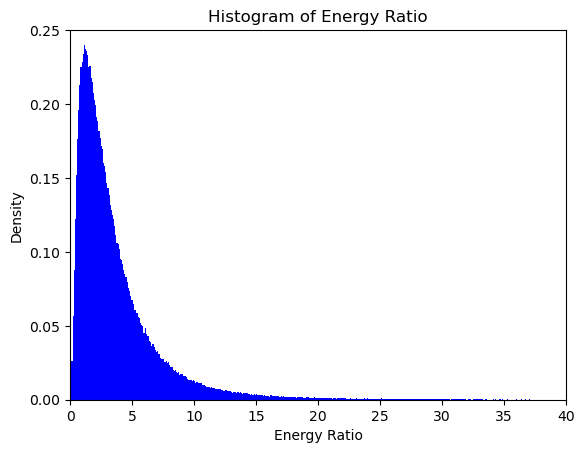

In [51]:
import matplotlib.pyplot as plt
plt.hist(merged["energy_Ratio"], color="blue", density=True, bins=1000)
plt.xlim(0, 40)
plt.ylim(0, 0.25)
plt.xlabel('Energy Ratio')
plt.ylabel('Density')
plt.title('Histogram of Energy Ratio')
plt.show()

In [52]:
print(merged.isna().sum())
cols = [
    #'HHID', 'month', 'household_type', 'quarter', 'NumChild_U5', 'NumChild_B5_7', 'NumChild_B7_18', 'NumChildOver18', 'NumOld', 'year',, 'AveAge'
    'region', 'weight', 'county_code', 'province_code', 'province', 'HHsize', 'HeadWoman', 'Dep_Student', 'Num_Literate', 'NumSpouse', 'NumEmployed', 
    'NumMale', 'NumNotfirstR', 'Tenure', 'Room', 'Area', 'Skeleton', 'MainMaterial', 'PrivateVehicle', 'Motorcycle', 'Bike', 'Radio', 'Cassette', 'TVbw', 'TV', 
    'VideoPlayer', 'Computer', 'Cellphone', 'Freezer', 'Refrigerator', 'Freez_refrig', 'Vacuum', 'Washer', 'Sewing', 'Fan', 'Cooler_water_portable', 
    'Cooler_gas_portable', 'Dishwasher', 'None', 'Pipewater', 'Electricity', 'Pipegas', 'Phone', 'Internet', 'Bathroom', 'Kitchen', 'Cooler_water', 
    'Centralcooler', 'Centralheat', 'Pakage', 'Cooler_gas', 'Sewer_network', 'Cookfuel', 'Heatfuel', 'Hotwaterfuel' 
    #'FoodExp', 'CigarExp', 'NonCatDrinksExp', 'ClothExp', 'InvestExp', 'FurnitureExp', 'MedicalExp', 'TransportationExp', 'CommunicationExp', 
    #'AmusementExp', 'RestaurantExp', 'HotelExp', 'OtherExp', 'RentExp', 'EstRent_ownerExp', 'EstRentExp', 'MortgageExp', 'WaterExp', 'Water_otherExp', 
    #'SewageExp', 'OtherHousingExp', 'ElectricityExp', 'ElectricityOtherExp', 'NaturalGasExp', 'NaturalGasOtherExp', 'OtherEnergyReExp', 'ClothesExtraExp', 
    #'HousingMaintainExp', 'FurniExtraExp', 'MedicalExtraExp', 'TransportationExtraExp', 'CommunicationExtraExp', 'AmusementExtraExp', 'EducationExp','OtherExtraExp'
]
#merged['AveAge'] = merged['AveAge'].fillna(merged.groupby('HHID')['AveAge'].transform('first')+(year - merged.groupby('HHID')["year"].transform('last')))
merged = merged.loc[merged["HHID"].str.len().isin([10,11]), :]
for col in cols:
    merged[col] = merged[col].fillna(merged.groupby('HHID')[col].transform('first'))
print(merged.isna().sum())

HHID                    0
month              151341
household_type          0
region                  0
quarter                 0
                    ...  
OtherExtraExp           0
year                    0
all_expenditure         0
all_energy_EXP          0
energy_Ratio        10430
Length: 104, dtype: int64
HHID                    0
month              151340
household_type          0
region                  0
quarter                 0
                    ...  
OtherExtraExp           0
year                    0
all_expenditure         0
all_energy_EXP          0
energy_Ratio        10429
Length: 104, dtype: int64


In [2]:
#merged.to_pickle("merged")
merged = pd.read_pickle("merged")